# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA

from loguru import logger

In [2]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
fifa = pd.read_csv("fifa.csv")

In [4]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.

fifa.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


## Verificando a dimensão e os tipos de dados

In [6]:
fifa.shape

(18207, 37)

In [7]:
fifa.dtypes

Age                  int64
Overall              int64
Potential            int64
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
GKDiving           float64
GKHandling         float64
GKKicking          float64
GKPositioning      float64
GKReflexes         float64
d

## Verificando a existencia de valores ausentes

In [8]:
fifa.isna().sum()

Age                 0
Overall             0
Potential           0
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

In [9]:
fifa.isna().sum()/fifa.shape[0]

Age                0.000000
Overall            0.000000
Potential          0.000000
Crossing           0.002636
Finishing          0.002636
HeadingAccuracy    0.002636
ShortPassing       0.002636
Volleys            0.002636
Dribbling          0.002636
Curve              0.002636
FKAccuracy         0.002636
LongPassing        0.002636
BallControl        0.002636
Acceleration       0.002636
SprintSpeed        0.002636
Agility            0.002636
Reactions          0.002636
Balance            0.002636
ShotPower          0.002636
Jumping            0.002636
Stamina            0.002636
Strength           0.002636
LongShots          0.002636
Aggression         0.002636
Interceptions      0.002636
Positioning        0.002636
Vision             0.002636
Penalties          0.002636
Composure          0.002636
Marking            0.002636
StandingTackle     0.002636
SlidingTackle      0.002636
GKDiving           0.002636
GKHandling         0.002636
GKKicking          0.002636
GKPositioning      0

## Excluindo as linhas ausentes

In [10]:
df = fifa.dropna()

In [11]:
df.shape

(18159, 37)

## Verificando a correlação entre as variáveis

In [12]:
df.corr()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Age,1.000000,0.453069,-0.252281,0.130545,0.068660,0.147183,0.132894,0.142472,0.010166,0.143276,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,0.453069,1.000000,0.661180,0.394972,0.332515,0.340776,0.502550,0.391338,0.372426,0.419491,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.252281,0.661180,1.000000,0.246319,0.243355,0.200988,0.369189,0.254906,0.315019,0.279944,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Crossing,0.130545,0.394972,0.246319,1.000000,0.655300,0.469507,0.809660,0.690339,0.856647,0.833105,...,0.645805,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539
Finishing,0.068660,0.332515,0.243355,0.655300,1.000000,0.473427,0.661830,0.882675,0.824337,0.759229,...,0.837827,0.533414,0.024218,-0.033023,-0.071811,-0.588752,-0.587145,-0.583268,-0.584852,-0.586913
HeadingAccuracy,0.147183,0.340776,0.200988,0.469507,0.473427,1.000000,0.640091,0.505639,0.550750,0.440846,...,0.551978,0.507208,0.583123,0.561063,0.533643,-0.750417,-0.749888,-0.746444,-0.744443,-0.748895
ShortPassing,0.132894,0.502550,0.369189,0.809660,0.661830,0.640091,1.000000,0.698309,0.843722,0.775398,...,0.676063,0.685137,0.559576,0.541131,0.508644,-0.729785,-0.728024,-0.724381,-0.723782,-0.728721
Volleys,0.142472,0.391338,0.254906,0.690339,0.882675,0.505639,0.698309,1.000000,0.809639,0.807285,...,0.829257,0.595281,0.120919,0.072788,0.035457,-0.590808,-0.588668,-0.584954,-0.586131,-0.588670
Dribbling,0.010166,0.372426,0.315019,0.856647,0.824337,0.550750,0.843722,0.809639,1.000000,0.842652,...,0.769594,0.597498,0.336072,0.301251,0.273963,-0.754625,-0.753181,-0.749816,-0.751348,-0.754341
Curve,0.143276,0.419491,0.279944,0.833105,0.759229,0.440846,0.775398,0.807285,0.842652,1.000000,...,0.751833,0.616532,0.289529,0.261481,0.232869,-0.606286,-0.603141,-0.600266,-0.603540,-0.604960


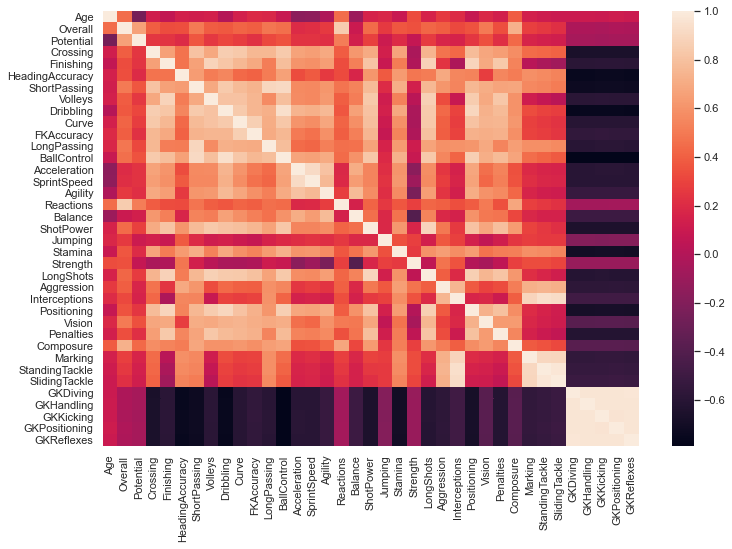

In [13]:
sns.heatmap(df.corr());

## Análise de Componentes Principais

**Primeiro vamos padronizar as variáveis a partir da  função** `StandardScaler` **do pacote** `sklearn.preprocessing`

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X_std = StandardScaler().fit_transform(df)

**Calculando a Matriz de Covariâncias (ou correlação, pois as variáveis estão padronizadas)**

In [16]:
cov_X = pd.DataFrame(X_std).cov()

In [17]:
cov_X

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.000055,0.453094,-0.252295,0.130553,0.068664,0.147191,0.132902,0.142480,0.010167,0.143284,...,0.139543,0.391045,0.142824,0.119751,0.103095,0.101282,0.106425,0.104969,0.116409,0.103318
1,0.453094,1.000055,0.661217,0.394994,0.332533,0.340795,0.502578,0.391360,0.372446,0.419514,...,0.341447,0.727695,0.286521,0.252643,0.222823,-0.025938,-0.025063,-0.029374,-0.017675,-0.023277
2,-0.252295,0.661217,1.000055,0.246332,0.243369,0.200999,0.369210,0.254921,0.315037,0.279960,...,0.224293,0.440032,0.162810,0.143572,0.128987,-0.053449,-0.054675,-0.059065,-0.052592,-0.053344
3,0.130553,0.394994,0.246332,1.000055,0.655336,0.469532,0.809704,0.690377,0.856694,0.833151,...,0.645841,0.575477,0.443125,0.428986,0.409983,-0.663089,-0.660229,-0.659803,-0.660196,-0.662576
4,0.068664,0.332533,0.243369,0.655336,1.000055,0.473453,0.661866,0.882724,0.824382,0.759271,...,0.837873,0.533443,0.024219,-0.033025,-0.071815,-0.588784,-0.587177,-0.583300,-0.584885,-0.586945
5,0.147191,0.340795,0.200999,0.469532,0.473453,1.000055,0.640126,0.505667,0.550781,0.440870,...,0.552009,0.507236,0.583155,0.561094,0.533672,-0.750459,-0.749930,-0.746485,-0.744484,-0.748937
6,0.132902,0.502578,0.369210,0.809704,0.661866,0.640126,1.000055,0.698348,0.843768,0.775441,...,0.676100,0.685175,0.559607,0.541161,0.508672,-0.729825,-0.728064,-0.724421,-0.723822,-0.728761
7,0.142480,0.391360,0.254921,0.690377,0.882724,0.505667,0.698348,1.000055,0.809683,0.807329,...,0.829303,0.595313,0.120925,0.072792,0.035459,-0.590841,-0.588701,-0.584987,-0.586163,-0.588703
8,0.010167,0.372446,0.315037,0.856694,0.824382,0.550781,0.843768,0.809683,1.000055,0.842698,...,0.769636,0.597531,0.336090,0.301267,0.273978,-0.754667,-0.753222,-0.749858,-0.751389,-0.754383
9,0.143284,0.419514,0.279960,0.833151,0.759271,0.440870,0.775441,0.807329,0.842698,1.000055,...,0.751875,0.616566,0.289545,0.261495,0.232882,-0.606320,-0.603174,-0.600300,-0.603573,-0.604993


In [18]:
cov_X = np.array(cov_X)

In [19]:
print('Matriz de covariancias \n%s' %cov_X)

Matriz de covariancias 
[[ 1.00005507  0.45309427 -0.25229513 ...  0.10496933  0.11640851
   0.10331826]
 [ 0.45309427  1.00005507  0.66121653 ... -0.02937388 -0.01767531
  -0.02327702]
 [-0.25229513  0.66121653  1.00005507 ... -0.05906471 -0.05259166
  -0.05334376]
 ...
 [ 0.10496933 -0.02937388 -0.05906471 ...  1.00005507  0.96438954
   0.96639022]
 [ 0.11640851 -0.01767531 -0.05259166 ...  0.96438954  1.00005507
   0.97018302]
 [ 0.10331826 -0.02327702 -0.05334376 ...  0.96639022  0.97018302
   1.00005507]]


**Calculando os Autovalores e os Autovetores da Matriz de Covariâncias**

In [20]:
np.linalg.eig(cov_X)

(array([19.14081064,  4.9351144 ,  3.63035671,  1.80049192,  1.37296262,
         1.19787528,  0.61294265,  0.46249058,  0.36588442,  0.30422662,
         0.27328518,  0.24481957,  0.23185161,  0.22360552,  0.20643004,
         0.20310552,  0.18836116,  0.17566832,  0.15702538,  0.13853422,
         0.12566906,  0.12412283,  0.11364763,  0.10434932,  0.0228317 ,
         0.02663065,  0.03072894,  0.03033813,  0.03666394,  0.03745837,
         0.04799318,  0.08795881,  0.08179949,  0.06131436,  0.07198973,
         0.06486038,  0.06783877]),
 array([[-0.0265132 , -0.07699996,  0.30255144, ...,  0.03476932,
         -0.11656278,  0.01893559],
        [-0.10297271, -0.03452601,  0.42697075, ..., -0.05543249,
          0.11467608, -0.04342748],
        [-0.0724939 ,  0.0215119 ,  0.23202836, ...,  0.06786167,
         -0.13037749,  0.05997825],
        ...,
        [ 0.19062557,  0.07214958,  0.23539552, ...,  0.0144554 ,
          0.01201963, -0.00093527],
        [ 0.19056552,  0.0698507

In [21]:
autovalores, autovetores = np.linalg.eig(cov_X)

**Cada autovalor representa a variância de cada componente principal. Veja que os autovalores não estão totalmente organizados em ordem decrescente**

In [22]:
pd.DataFrame(autovalores)

,0
0,19.140811
1,4.935114
2,3.630357
3,1.800492
4,1.372963
5,1.197875
6,0.612943
7,0.462491
8,0.365884
9,0.304227


**Cada elemento do autovetor (cada elemento da coluna) representa o coeficiente de UMA Componente Principal**

In [23]:
pd.DataFrame(autovetores)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-0.026513,-0.077000,0.302551,-0.242665,-0.189389,0.548797,0.166502,0.294168,0.036032,0.139609,...,0.024638,0.024095,0.003100,0.325144,0.077716,0.119211,0.033953,0.034769,-0.116563,0.018936
1,-0.102973,-0.034526,0.426971,0.096054,0.149332,-0.077201,0.099752,0.159733,0.087088,0.087246,...,-0.036074,-0.141617,-0.017185,-0.731879,-0.040824,-0.061699,-0.024014,-0.055432,0.114676,-0.043427
2,-0.072494,0.021512,0.232028,0.285796,0.276054,-0.569925,-0.132807,0.063376,0.117052,0.029154,...,0.020605,0.045143,-0.001072,0.404555,0.159619,0.171818,0.038887,0.067862,-0.130377,0.059978
3,-0.198893,0.041199,0.011303,0.129907,-0.154370,0.074674,0.112205,-0.105643,0.110719,0.241065,...,-0.012147,0.037089,-0.022018,0.021952,0.208195,-0.033413,-0.091189,-0.003091,0.115408,0.008685
4,-0.178195,0.219714,0.025367,-0.184359,0.050313,-0.044002,-0.016560,-0.007654,-0.042076,-0.149692,...,0.004455,0.005477,-0.001927,0.126282,0.276684,0.109940,-0.011297,-0.446709,0.513860,-0.287636
5,-0.163869,-0.174377,-0.023018,-0.274493,0.220043,-0.097767,-0.046269,0.215698,0.040176,0.059839,...,0.011506,0.002165,0.026022,0.096315,0.008842,-0.141374,0.052343,0.075227,-0.007584,-0.013955
6,-0.210344,-0.033598,0.056309,0.050509,-0.106968,-0.088207,-0.042215,0.005465,-0.257037,0.157343,...,0.011096,-0.253141,0.106602,0.177511,-0.227755,-0.048166,-0.704637,0.039812,0.084288,0.065098
7,-0.184422,0.174769,0.060852,-0.171435,-0.006384,-0.020145,-0.067800,-0.007931,0.141719,-0.108253,...,0.002441,0.008949,-0.005327,-0.014340,-0.153144,-0.027495,0.034797,0.071108,-0.076547,0.062120
8,-0.212113,0.106700,-0.025927,0.040186,-0.013844,-0.038274,0.060386,0.012494,-0.089722,0.056487,...,-0.000498,-0.510901,0.198261,0.160159,-0.320072,-0.349372,0.483422,-0.056494,-0.093247,-0.029569
9,-0.195197,0.117477,0.061414,0.015209,-0.164404,0.019110,-0.057692,-0.170838,0.287395,0.160416,...,-0.008371,0.003832,0.007445,0.011012,0.150987,0.045939,-0.049277,-0.045481,0.041936,-0.030067


**Aqui será construido uma lista com cada autovalor associado com seu repectivo autovetor**

In [24]:
ordena_auto_vetores_valores = [(np.abs(autovalores[i]), autovetores[:,i]) for i in range(len(autovalores))]

In [25]:
ordena_auto_vetores_valores

[(19.140810644470847,
  array([-0.0265132 , -0.10297271, -0.0724939 , -0.19889281, -0.17819502,
         -0.1638691 , -0.21034388, -0.18442208, -0.21211293, -0.19519653,
         -0.18224387, -0.18663737, -0.21923779, -0.16189309, -0.16022649,
         -0.16501543, -0.10350796, -0.14321637, -0.19610241, -0.06144932,
         -0.18423029, -0.03081594, -0.19496031, -0.14646587, -0.11696287,
         -0.19893685, -0.16307641, -0.17974507, -0.15838664, -0.12377792,
         -0.11685625, -0.10950511,  0.19167861,  0.19136938,  0.19062557,
          0.19056552,  0.19147413])),
 (4.935114400800307,
  array([-0.07699996, -0.03452601,  0.0215119 ,  0.04119857,  0.21971439,
         -0.17437711, -0.03359762,  0.17476933,  0.10670048,  0.11747659,
          0.09419546, -0.07084961,  0.03800719,  0.13579805,  0.11405609,
          0.16599466, -0.03378402,  0.14564499,  0.08102723, -0.1200999 ,
         -0.09997778, -0.24034106,  0.14263926, -0.26271865, -0.3494509 ,
          0.15202543,  0.143368

**Aqui essa lista será ordenada em ordem decrescentes. Os maiores autovalores (maiores variâncias) estão no inicio e os menores no final**

In [26]:
ordena_auto_vetores_valores.sort(key=lambda x: x[0], reverse=True)

In [27]:
ordena_auto_vetores_valores

[(19.140810644470847,
  array([-0.0265132 , -0.10297271, -0.0724939 , -0.19889281, -0.17819502,
         -0.1638691 , -0.21034388, -0.18442208, -0.21211293, -0.19519653,
         -0.18224387, -0.18663737, -0.21923779, -0.16189309, -0.16022649,
         -0.16501543, -0.10350796, -0.14321637, -0.19610241, -0.06144932,
         -0.18423029, -0.03081594, -0.19496031, -0.14646587, -0.11696287,
         -0.19893685, -0.16307641, -0.17974507, -0.15838664, -0.12377792,
         -0.11685625, -0.10950511,  0.19167861,  0.19136938,  0.19062557,
          0.19056552,  0.19147413])),
 (4.935114400800307,
  array([-0.07699996, -0.03452601,  0.0215119 ,  0.04119857,  0.21971439,
         -0.17437711, -0.03359762,  0.17476933,  0.10670048,  0.11747659,
          0.09419546, -0.07084961,  0.03800719,  0.13579805,  0.11405609,
          0.16599466, -0.03378402,  0.14564499,  0.08102723, -0.1200999 ,
         -0.09997778, -0.24034106,  0.14263926, -0.26271865, -0.3494509 ,
          0.15202543,  0.143368

In [28]:
ordena_auto_vetores_valores[0][0]

19.140810644470847

In [29]:
ordena_auto_vetores_valores[0][1]

array([-0.0265132 , -0.10297271, -0.0724939 , -0.19889281, -0.17819502,
       -0.1638691 , -0.21034388, -0.18442208, -0.21211293, -0.19519653,
       -0.18224387, -0.18663737, -0.21923779, -0.16189309, -0.16022649,
       -0.16501543, -0.10350796, -0.14321637, -0.19610241, -0.06144932,
       -0.18423029, -0.03081594, -0.19496031, -0.14646587, -0.11696287,
       -0.19893685, -0.16307641, -0.17974507, -0.15838664, -0.12377792,
       -0.11685625, -0.10950511,  0.19167861,  0.19136938,  0.19062557,
        0.19056552,  0.19147413])

In [30]:
ordena_auto_vetores_valores[1][1]

array([-0.07699996, -0.03452601,  0.0215119 ,  0.04119857,  0.21971439,
       -0.17437711, -0.03359762,  0.17476933,  0.10670048,  0.11747659,
        0.09419546, -0.07084961,  0.03800719,  0.13579805,  0.11405609,
        0.16599466, -0.03378402,  0.14564499,  0.08102723, -0.1200999 ,
       -0.09997778, -0.24034106,  0.14263926, -0.26271865, -0.3494509 ,
        0.15202543,  0.14336807,  0.14631181, -0.02188107, -0.33381523,
       -0.356561  , -0.3588385 ,  0.07122152,  0.07166494,  0.07214958,
        0.06985077,  0.07122471])

#### Principais propriedades dos Autovalores e autovetores em análise de componentes principais

**Propriedade 1: Veja que a soma dos quadrados de um autovetor qualquer é igual a 1, ou seja, o produto interno de um autovetor por ele mesmo é igual a 1. No exemplo abaixo utilizamos a primeira componente para demostrar**

In [31]:
np.dot((ordena_auto_vetores_valores[0][1]),(ordena_auto_vetores_valores[0][1])).round(4)

1.0

In [32]:
#outra forma de fazer
sum((ordena_auto_vetores_valores[0][1])*(ordena_auto_vetores_valores[0][1])).round(4)

1.0

**Propriedade 2: Veja que o produto interno de dois autovetores distintos é igual a 0. No exemplo abaixo utilizamos o primeiro autovetor (coeficientes da primeira componente) e o segundo auto vetor (coeficientes da segunda componente)**

In [33]:
np.dot((ordena_auto_vetores_valores[0][1]),(ordena_auto_vetores_valores[1][1])).round(4)

0.0

In [34]:
#outra forma de fazer
sum( (ordena_auto_vetores_valores[0][1])*(ordena_auto_vetores_valores[1][1]) ).round(4)

0.0

**Uma coisa importante que vale resaltar é que o traço da matriz de covariâncias de X é igual a soma de todos os autovalores (variâncias das componentes)**

In [35]:
np.trace(cov_X).round(4)

37.002

In [36]:
var_total = sum(autovalores)

In [37]:
var_total.round(4)

37.002

**Calculando a proporção de variância total de "X_std" que é explicada por cada componente**

In [38]:
autovalores

array([19.14081064,  4.9351144 ,  3.63035671,  1.80049192,  1.37296262,
        1.19787528,  0.61294265,  0.46249058,  0.36588442,  0.30422662,
        0.27328518,  0.24481957,  0.23185161,  0.22360552,  0.20643004,
        0.20310552,  0.18836116,  0.17566832,  0.15702538,  0.13853422,
        0.12566906,  0.12412283,  0.11364763,  0.10434932,  0.0228317 ,
        0.02663065,  0.03072894,  0.03033813,  0.03666394,  0.03745837,
        0.04799318,  0.08795881,  0.08179949,  0.06131436,  0.07198973,
        0.06486038,  0.06783877])

In [39]:
autovalores = sorted(autovalores, reverse = True)
print(autovalores)

[19.140810644470847, 4.935114400800307, 3.6303567114346307, 1.8004919220982931, 1.3729626239339303, 1.1978752843404992, 0.6129426520781225, 0.4624905827764283, 0.36588441897038154, 0.3042266232672812, 0.2732851798657068, 0.24481957447307656, 0.23185161244387587, 0.22360552361744437, 0.20643004344939733, 0.2031055168030664, 0.18836115945525703, 0.17566831863772345, 0.1570253765249576, 0.13853421965892654, 0.12566905837979528, 0.12412282770088098, 0.11364762566013681, 0.10434932498029918, 0.08795881029479304, 0.08179948730447194, 0.07198972849100949, 0.06783876808473867, 0.06486038492762418, 0.06131435797444315, 0.047993181167252354, 0.037458373610531844, 0.03666393777802623, 0.03072893626852072, 0.030338128593070206, 0.026630651669184144, 0.022831697361875725]


In [40]:
var_explicada = [ ((i/var_total)*100) for i in autovalores ]

In [41]:
print(var_explicada)

[51.72907182981292, 13.337412509280941, 9.811234570041224, 4.865926407047184, 3.7105054489237457, 3.2373224821962756, 1.6565105347857525, 1.2499057130563496, 0.9888223514606254, 0.8221888372361404, 0.7385679197124362, 0.6616380877745274, 0.6265914718419578, 0.6043059725942699, 0.5578883122439711, 0.5489035998991019, 0.509056179928434, 0.47475309389042214, 0.42436953858635845, 0.37439619108785166, 0.33962739971994005, 0.3354486280189555, 0.30713883023335403, 0.2820096717720606, 0.23771342292227265, 0.22106752075504257, 0.19455611913677698, 0.1833379250379435, 0.17528868411848506, 0.16570535526273766, 0.12970415736593557, 0.1012332724626219, 0.09908626683118948, 0.0830466055494483, 0.08199042675480245, 0.07197077065635625, 0.06170389200157465]


**Obtendo a soma acumulada das proporções de variâncias explicadas por cada componente. Veja que a primeira e a segunda componente são responsaveis por explicar 65% da variabilidade de "X_std". 
Para conseguir explicar 95% da variabilidade de "X_std" são necessárias 16 componentes**

In [42]:
np.cumsum(var_explicada)

array([ 51.72907183,  65.06648434,  74.87771891,  79.74364532,
        83.45415077,  86.69147325,  88.34798378,  89.5978895 ,
        90.58671185,  91.40890068,  92.1474686 ,  92.80910669,
        93.43569816,  94.04000414,  94.59789245,  95.14679605,
        95.65585223,  96.13060532,  96.55497486,  96.92937105,
        97.26899845,  97.60444708,  97.91158591,  98.19359558,
        98.431309  ,  98.65237652,  98.84693264,  99.03027057,
        99.20555925,  99.37126461,  99.50096877,  99.60220204,
        99.70128831,  99.78433491,  99.86632534,  99.93829611,
       100.        ])

**Obtendo os escores das componentes**

In [43]:
coef_comp1 = ordena_auto_vetores_valores[0][1]

In [44]:
coef_comp1

array([-0.0265132 , -0.10297271, -0.0724939 , -0.19889281, -0.17819502,
       -0.1638691 , -0.21034388, -0.18442208, -0.21211293, -0.19519653,
       -0.18224387, -0.18663737, -0.21923779, -0.16189309, -0.16022649,
       -0.16501543, -0.10350796, -0.14321637, -0.19610241, -0.06144932,
       -0.18423029, -0.03081594, -0.19496031, -0.14646587, -0.11696287,
       -0.19893685, -0.16307641, -0.17974507, -0.15838664, -0.12377792,
       -0.11685625, -0.10950511,  0.19167861,  0.19136938,  0.19062557,
        0.19056552,  0.19147413])

In [45]:
coef_comp1.reshape(len(autovalores), 1)

array([[-0.0265132 ],
       [-0.10297271],
       [-0.0724939 ],
       [-0.19889281],
       [-0.17819502],
       [-0.1638691 ],
       [-0.21034388],
       [-0.18442208],
       [-0.21211293],
       [-0.19519653],
       [-0.18224387],
       [-0.18663737],
       [-0.21923779],
       [-0.16189309],
       [-0.16022649],
       [-0.16501543],
       [-0.10350796],
       [-0.14321637],
       [-0.19610241],
       [-0.06144932],
       [-0.18423029],
       [-0.03081594],
       [-0.19496031],
       [-0.14646587],
       [-0.11696287],
       [-0.19893685],
       [-0.16307641],
       [-0.17974507],
       [-0.15838664],
       [-0.12377792],
       [-0.11685625],
       [-0.10950511],
       [ 0.19167861],
       [ 0.19136938],
       [ 0.19062557],
       [ 0.19056552],
       [ 0.19147413]])

In [46]:
coef_comp2 = ordena_auto_vetores_valores[1][1]

In [47]:
coef_comp2

array([-0.07699996, -0.03452601,  0.0215119 ,  0.04119857,  0.21971439,
       -0.17437711, -0.03359762,  0.17476933,  0.10670048,  0.11747659,
        0.09419546, -0.07084961,  0.03800719,  0.13579805,  0.11405609,
        0.16599466, -0.03378402,  0.14564499,  0.08102723, -0.1200999 ,
       -0.09997778, -0.24034106,  0.14263926, -0.26271865, -0.3494509 ,
        0.15202543,  0.14336807,  0.14631181, -0.02188107, -0.33381523,
       -0.356561  , -0.3588385 ,  0.07122152,  0.07166494,  0.07214958,
        0.06985077,  0.07122471])

In [48]:
coef_comp2.reshape(len(autovalores),1)

array([[-0.07699996],
       [-0.03452601],
       [ 0.0215119 ],
       [ 0.04119857],
       [ 0.21971439],
       [-0.17437711],
       [-0.03359762],
       [ 0.17476933],
       [ 0.10670048],
       [ 0.11747659],
       [ 0.09419546],
       [-0.07084961],
       [ 0.03800719],
       [ 0.13579805],
       [ 0.11405609],
       [ 0.16599466],
       [-0.03378402],
       [ 0.14564499],
       [ 0.08102723],
       [-0.1200999 ],
       [-0.09997778],
       [-0.24034106],
       [ 0.14263926],
       [-0.26271865],
       [-0.3494509 ],
       [ 0.15202543],
       [ 0.14336807],
       [ 0.14631181],
       [-0.02188107],
       [-0.33381523],
       [-0.356561  ],
       [-0.3588385 ],
       [ 0.07122152],
       [ 0.07166494],
       [ 0.07214958],
       [ 0.06985077],
       [ 0.07122471]])

In [49]:
O = np.concatenate( (coef_comp1.reshape(len(autovalores), 1) ,
                 coef_comp2.reshape(len(autovalores), 1)), axis = 1  )

**Matriz com os coeficientes das componentes 1 e 2, na primeira coluna tem-se os coeficientes da primeira componente enquanto que na segunda coluna tem-se os coeficientes da segunda componente**

In [50]:
O

array([[-0.0265132 , -0.07699996],
       [-0.10297271, -0.03452601],
       [-0.0724939 ,  0.0215119 ],
       [-0.19889281,  0.04119857],
       [-0.17819502,  0.21971439],
       [-0.1638691 , -0.17437711],
       [-0.21034388, -0.03359762],
       [-0.18442208,  0.17476933],
       [-0.21211293,  0.10670048],
       [-0.19519653,  0.11747659],
       [-0.18224387,  0.09419546],
       [-0.18663737, -0.07084961],
       [-0.21923779,  0.03800719],
       [-0.16189309,  0.13579805],
       [-0.16022649,  0.11405609],
       [-0.16501543,  0.16599466],
       [-0.10350796, -0.03378402],
       [-0.14321637,  0.14564499],
       [-0.19610241,  0.08102723],
       [-0.06144932, -0.1200999 ],
       [-0.18423029, -0.09997778],
       [-0.03081594, -0.24034106],
       [-0.19496031,  0.14263926],
       [-0.14646587, -0.26271865],
       [-0.11696287, -0.3494509 ],
       [-0.19893685,  0.15202543],
       [-0.16307641,  0.14336807],
       [-0.17974507,  0.14631181],
       [-0.15838664,

**Calculando os escores das componentes 1 e 2**

In [51]:
y = np.dot(X_std, O)

In [52]:
y

array([[-8.97775105,  5.06169855],
       [-8.7671419 ,  3.40788914],
       [-8.19274477,  4.84676052],
       ...,
       [ 3.28352323,  2.7607322 ],
       [ 3.19988724,  2.69278331],
       [ 2.78282512, -0.43462153]])

In [53]:
y = pd.DataFrame(y)

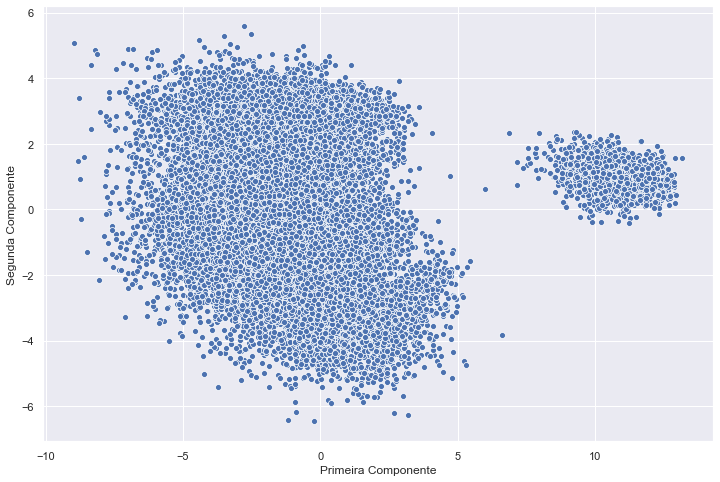

In [54]:
sns.scatterplot(data=y, x = y[0], y = y[1])
plt.xlabel("Primeira Componente")
plt.ylabel("Segunda Componente");

## Análise de Componentes Principais usando o pacote `sklearn.decomposition`

In [55]:
pca = PCA().fit(df)

### Proporção de variancia explicada por cada componente

In [56]:
propvar = pca.explained_variance_ratio_
print(propvar)

[5.65280555e-01 1.81025219e-01 5.95283391e-02 4.34269284e-02
 2.63532326e-02 1.20707695e-02 1.03550495e-02 8.52951131e-03
 7.87862979e-03 7.20416677e-03 7.18180297e-03 6.32893542e-03
 5.19242286e-03 4.90798293e-03 4.74209042e-03 4.62772008e-03
 4.25173246e-03 3.86288432e-03 3.76588448e-03 3.75092615e-03
 3.47815213e-03 3.26730709e-03 3.03137944e-03 2.97415845e-03
 2.56797543e-03 2.30353342e-03 2.14815132e-03 1.56135904e-03
 1.55351696e-03 1.08664227e-03 1.06824189e-03 1.05891525e-03
 9.58143746e-04 8.89209394e-04 8.59732430e-04 7.34611045e-04
 1.94187517e-04]


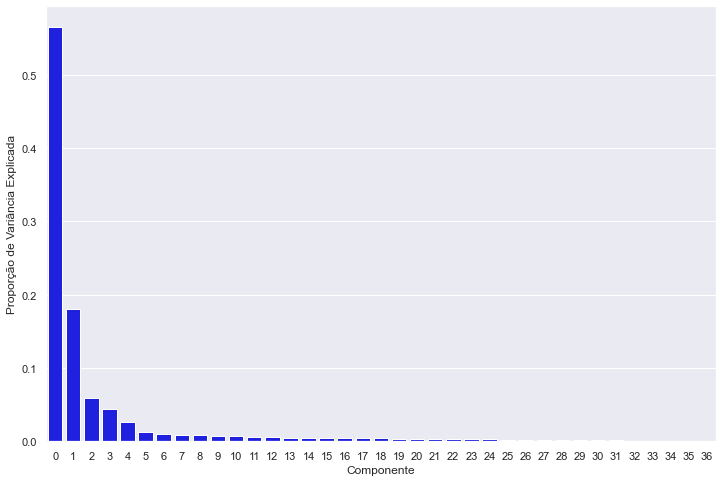

In [57]:
sns.barplot(x = list(range(37)), y = propvar, color="blue")
plt.xlabel("Componente")
plt.ylabel("Proporção de Variância Explicada");

In [58]:
np.cumsum(propvar)

array([0.56528056, 0.74630577, 0.80583411, 0.84926104, 0.87561427,
       0.88768504, 0.89804009, 0.9065696 , 0.91444823, 0.9216524 ,
       0.9288342 , 0.93516314, 0.94035556, 0.94526355, 0.95000564,
       0.95463336, 0.95888509, 0.96274797, 0.96651386, 0.97026478,
       0.97374294, 0.97701024, 0.98004162, 0.98301578, 0.98558376,
       0.98788729, 0.99003544, 0.9915968 , 0.99315032, 0.99423696,
       0.9953052 , 0.99636412, 0.99732226, 0.99821147, 0.9990712 ,
       0.99980581, 1.        ])

**Número de componentes necessárias para explicar 95% da variancia total dos dados**

In [59]:
num_comp = np.argmax(np.cumsum(propvar)>0.95) + 1
num_comp

15

In [61]:
#outra forma de encontrar o numero de componentes necessarias para explicar 95% da variancia total dos dados
escores = PCA(n_components=0.95).fit_transform(df)


In [62]:
escores.shape[1]

15

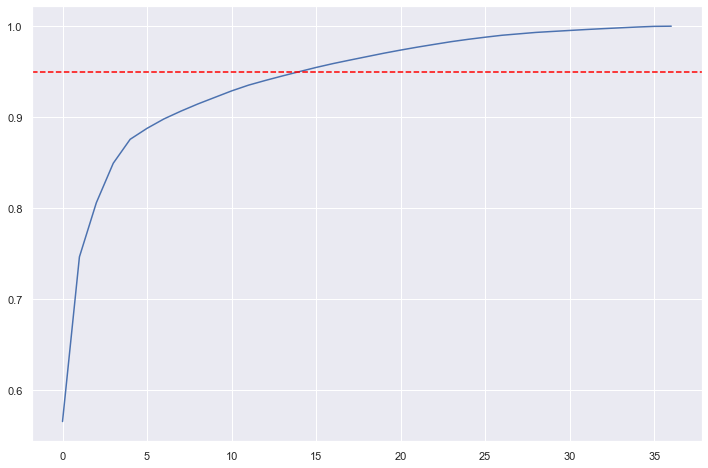

In [63]:
sns.lineplot(x= list(range(37)) ,y=np.cumsum(propvar))
plt.axhline(0.95, ls="--", color="red");

**Obtendo os escores com as duas primeiras componentes**

In [65]:
escores = PCA(n_components=2).fit_transform(df)

In [66]:
escores

array([[-126.71792515, -105.58000764],
       [-123.36568604,  -88.98416141],
       [-115.11013638,  -94.77505594],
       ...,
       [  49.83476757,  -44.19006161],
       [  42.8077879 ,  -39.12437286],
       [  37.17937197,   15.60717604]])

In [67]:
escores_t=pd.DataFrame(escores)

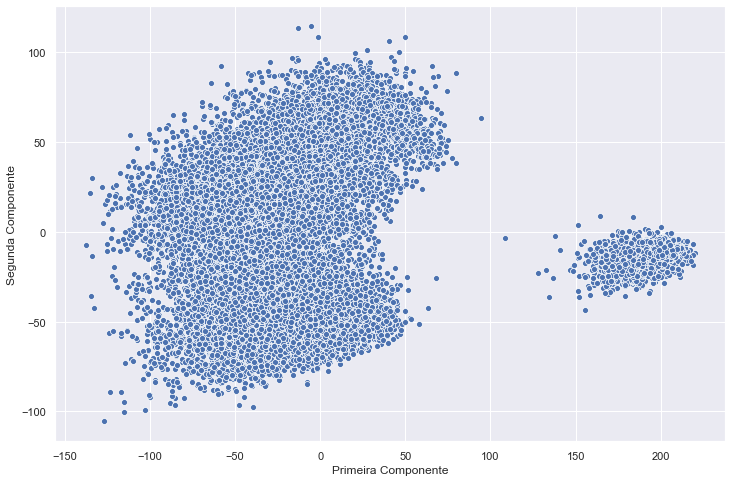

In [68]:
sns.scatterplot(data=escores_t, x = escores_t[0], y = escores_t[1])
plt.xlabel("Primeira Componente")
plt.ylabel("Segunda Componente");

**Obtendo duas compenentes principais dos dados "df"**

In [69]:
pca = PCA(n_components=2).fit(df)

In [70]:
pca.fit_transform(df)

array([[-126.71792515, -105.58000764],
       [-123.36568604,  -88.98416141],
       [-115.11013638,  -94.77505594],
       ...,
       [  49.83476757,  -44.19006161],
       [  42.8077879 ,  -39.12437286],
       [  37.17937197,   15.60717604]])

**Verificando os coeficientes da primeira e segunda componente respectivamente**

In [71]:
pca.components_.T

array([[-6.16388751e-03,  8.87203494e-03],
       [-3.70623864e-02,  1.58367355e-04],
       [-2.27401748e-02, -7.78142440e-03],
       [-2.13639023e-01, -4.43084573e-02],
       [-1.98891213e-01, -2.57629630e-01],
       [-1.70828950e-01,  1.18911964e-01],
       [-1.80309140e-01,  1.21869793e-02],
       [-1.87038764e-01, -1.91182282e-01],
       [-2.33139606e-01, -1.18898465e-01],
       [-2.07690956e-01, -1.27744634e-01],
       [-1.84764187e-01, -1.00178915e-01],
       [-1.67186902e-01,  4.89136910e-02],
       [-2.12972623e-01, -5.12678591e-02],
       [-1.38740617e-01, -9.84027581e-02],
       [-1.34902279e-01, -8.39018967e-02],
       [-1.38433521e-01, -1.21564730e-01],
       [-4.91611013e-02,  9.67807471e-04],
       [-1.16410947e-01, -9.04417070e-02],
       [-1.95840156e-01, -1.04656794e-01],
       [-4.07181861e-02,  5.73651299e-02],
       [-1.72711671e-01,  6.82049478e-02],
       [-2.33585866e-02,  1.19388946e-01],
       [-2.16594765e-01, -1.73409231e-01],
       [-1.

In [72]:
y_escores = np.dot(df,pca.components_.T)

In [73]:
# escores não padronizados
y_escores

array([[-355.89255617, -104.32707608],
       [-352.54031707,  -87.73122984],
       [-344.28476741,  -93.52212437],
       ...,
       [-179.33986345,  -42.93713004],
       [-186.36684312,  -37.87144129],
       [-191.99525905,   16.86010761]])

In [74]:
#escores centralizados
pd.DataFrame(y_escores) - pd.DataFrame(y_escores).mean() 

,0,1
0,-126.717925,-105.580008
1,-123.365686,-88.984161
2,-115.110136,-94.775056
3,165.045120,-25.258196
4,-134.679105,-35.556799
...,...,...
18154,37.681810,9.802081
18155,67.867901,-25.621613
18156,49.834768,-44.190062
18157,42.807788,-39.124373


## Seleção de variáveis com o método *Forward selection*

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [76]:
df.columns

Index(['Age', 'Overall', 'Potential', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [77]:
Y = df["Overall"]

In [78]:
X = df.drop(columns="Overall", axis=1)

In [79]:
df.shape

(18159, 37)

In [80]:
X.shape

(18159, 36)

In [81]:
reg = LinearRegression()

In [82]:
forward = RFE(reg, n_features_to_select = 5)

In [83]:
variaveis = forward.fit(X,Y)

In [84]:
variaveis_selecionadas = variaveis.support_

In [85]:
variaveis_selecionadas

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [86]:
X.columns[variaveis_selecionadas]

Index(['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes'], dtype='object')

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [87]:
def q1():
    # Retorne aqui o resultado da questão 1.
    pca = PCA().fit(df)
    propvar = pca.explained_variance_ratio_
    return propvar[0].round(3)

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [88]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return PCA(n_components=0.95).fit_transform(df).shape[1]

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [89]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [90]:
def q3():
    # Retorne aqui o resultado da questão 3.
    pca = PCA(n_components=2).fit(df)
    coeficientes = pca.components_.T
    escores = np.dot(x, coeficientes)
    return tuple(escores.round(3))

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [91]:
def q4():
    # Retorne aqui o resultado da questão 4.
    Y = df["Overall"]
    X = df.drop(columns="Overall", axis=1)
    reg = LinearRegression()
    forward = RFE(reg, n_features_to_select = 5)
    variaveis = forward.fit(X,Y)
    variaveis_selecionadas = variaveis.support_
    return list(X.columns[variaveis_selecionadas])